In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
%matplotlib inline

In [3]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
match_ids = matches[matches.season >= 2016]['id'].unique()

In [6]:
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [7]:
team_1 = 'Chennai Super Kings'
team_2 = 'Sunrisers Hyderabad'

In [8]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

## The plot below suggests that SRH will win the match

Text(0.5, 1.0, 'Percentage of Winning')

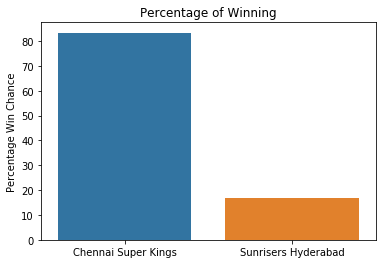

In [37]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

In [10]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

# Number of wides bowled in the match

### 1st Method: By analysing bowlers

In [12]:
bowler_squad = ['T Natarajan', "K Ahmed", "S Sharma", "Rashid Khan", "SN Thakur", "DL Chahar", "KV Sharma", "DJ Bravo", "RA Jadeja", "S Curran", "SR Watson"]
bowlers_wide = dict()
for bowler in bowler_squad:
    no_of_wides_per_match = np.median(delivery[delivery['bowler']==bowler].groupby('match_id').sum()['wide_runs'])
    bowlers_wide[bowler] = no_of_wides_per_match

sum(bowlers_wide.values())

8.0

### 2nd Method: By analysing teams

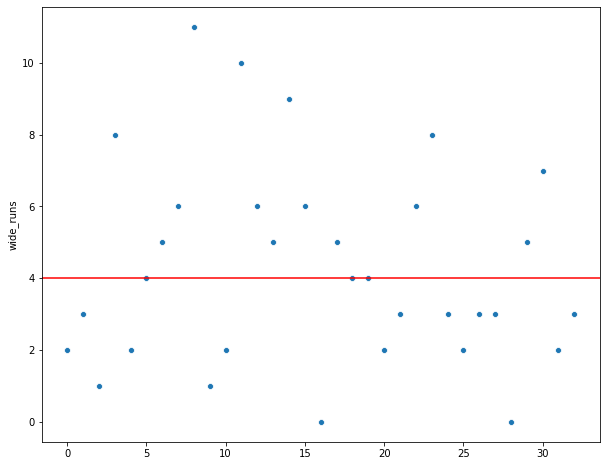

In [13]:
plt.figure(figsize=(10,8))
csk_bowling = delivery[delivery['bowling_team']==team_1].groupby('match_id').sum().reset_index()
sns.scatterplot(x=csk_bowling.index, y="wide_runs", data=csk_bowling)
plt.axhline(y=round(np.mean(csk_bowling['wide_runs'])), color='red')

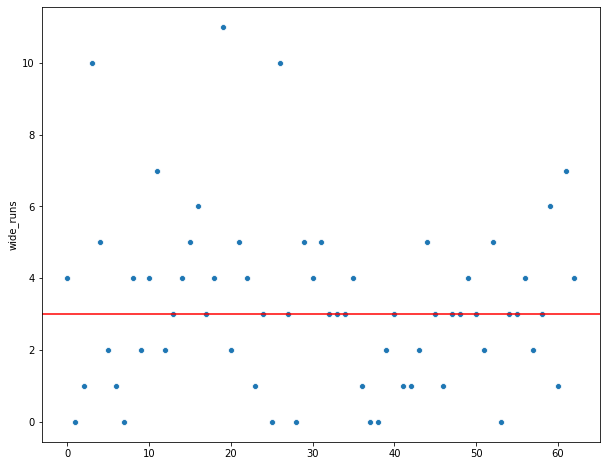

In [14]:
plt.figure(figsize=(10,8))
srh_bowling = delivery[delivery['bowling_team']==team_2].groupby('match_id').sum().reset_index()
sns.scatterplot(x=srh_bowling.index, y="wide_runs", data=srh_bowling)
plt.axhline(y=round(np.mean(srh_bowling['wide_runs'])), color='red')

In [15]:
print("Total wides bowled in the match will be:", round(np.mean(srh_bowling['wide_runs']))+round(np.mean(csk_bowling['wide_runs'])))

Total wides bowled in the match will be: 7


### So, the wides bowled tommorrow will be in range 6 to 8.

# David Warner Score Probability

In [16]:
dw = 'DA Warner'
dw_matches = delivery[(delivery.batting_team==team_2) & (delivery.batsman==dw)]


Text(0.5, 1.0, 'David Warner score in SRH against all CSK matches')

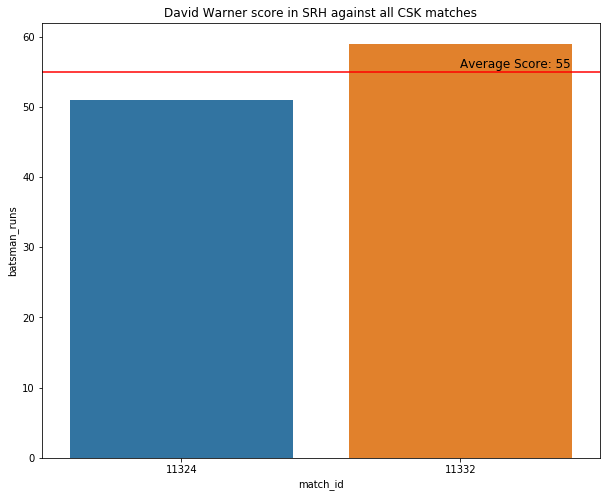

In [17]:
dw_vs_csk = dw_matches[dw_matches['bowling_team']==team_1].groupby('match_id').sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='match_id', y='batsman_runs', data=dw_vs_csk)
plt.axhline(y=np.mean(dw_vs_csk['batsman_runs']), color='red')
plt.text(x=1, y=np.mean(dw_vs_csk['batsman_runs'])+0.5, fontsize=12, s='Average Score: {}'.format(round(np.mean(dw_vs_csk['batsman_runs']))))
plt.title('David Warner score in SRH against all CSK matches')

# Number of wickets CSK will loose.

Text(0, 0.5, 'No. of wickets')

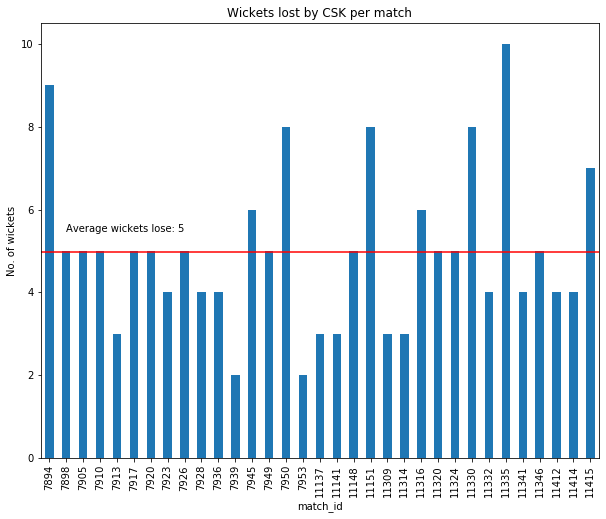

In [18]:
plt.figure(figsize=(10,8))
csk_matches = delivery[delivery['batting_team']==team_1].groupby('match_id').sum()
csk_matches['player_dismissed'].plot(kind='bar')
plt.axhline(y=np.mean(csk_matches['player_dismissed']), color='red')
plt.text(x=1, y=np.mean(csk_matches['player_dismissed'])+0.5, s= "Average wickets lose: {} ".format(round(np.mean(csk_matches['player_dismissed']))))
plt.title("Wickets lost by CSK per match")
plt.ylabel("No. of wickets")

# Total Runs Scored in Tommorrow's Match

In [19]:
srh_matches = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()

In [40]:
average_runs_csk = csk_matches[csk_matches['total_runs']>100]['total_runs'].mean()
average_runs_srh = srh_matches[srh_matches['total_runs']>100]['total_runs'].mean()
print("Total predicted runs scored totaly in tommorow's match = ", round(average_runs_csk+average_runs_srh))
print("This data was used neglecting the extremes. So, for rough estimation, the predicted runs be more than 336.")

Total predicted runs scored totaly in tommorow's match =  336
This data was used neglecting the extremes. So, for rough estimation, the predicted runs be more than 336.


# Summary

- Dataset was filtered and data from 2016 to 2019 was considered and non-required columns were dropped.
- Using the team winner of every match played between CSK and SRH, the chances of winning of CSK and SRH was taken out. 
- The predicted bowlers for today;s match was considered for wide balls prediction. Number of wides generally bowled by bowler in a match was considered and then summed to take out the no. of wides that will be bowled in this match. To recheck this, no. of wides generally bowled by the team per match was considered. 
- To estimate David Warner runs, the average runs scored by David Warner so far was considered.
- To estimate the number of wickets that will be lost by CSK, the average wickets out of CSK per match was considered. 

